In [4]:
# Data Preprocessing Template

using DataFrames
using CSV
using Random
using MLDataUtils

Random.seed!(0)

# Importing the dataset
df = CSV.File("Salary_Data.csv") |> DataFrames.DataFrame!;

(df_train, df_test) = splitobs(shuffleobs(df));

In [18]:
using GLM

regressor = lm(@formula(Salary ~ YearsExperience), df_train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + YearsExperience

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                 Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)      25705.4     2795.92    9.19391    <1e-7    19853.5     31557.4
YearsExperience   9487.23     475.386  19.9569     <1e-13    8492.23    10482.2
───────────────────────────────────────────────────────────────────────────────

In [7]:
coef(regressor)

2-element Array{Float64,1}:
 25705.42933268597
  9487.228213753171

In [8]:
y_pred = predict(regressor, df_test);

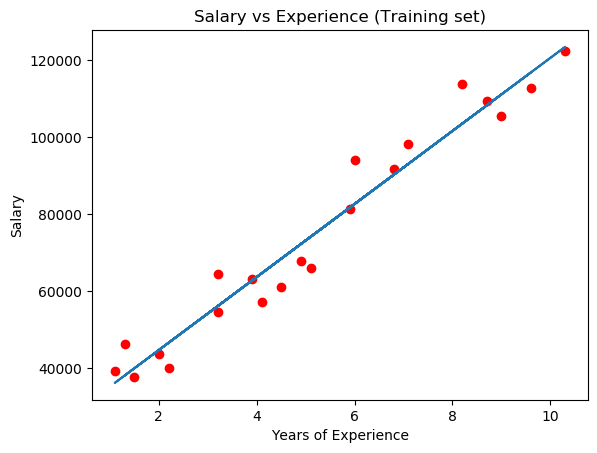

In [9]:
using PyPlot

X_train = df_train[!, :YearsExperience]
X_test  = df_test[!, :YearsExperience]

y_train = df_train[!, :Salary ]
y_test  = df_test[!, :Salary ]

scatter(X_train, y_train, color = :red)
plot(X_train, predict(regressor, df_train))
title("Salary vs Experience (Training set)")
xlabel("Years of Experience")
ylabel("Salary")
show()

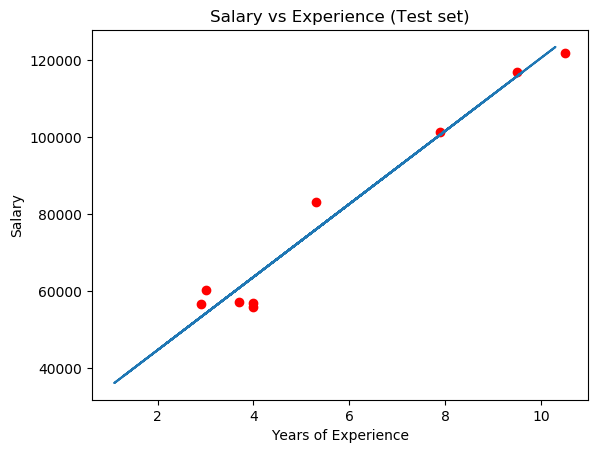

In [10]:
scatter(X_test, y_test, color = :red)
plot(X_train, predict(regressor, df_train))
title("Salary vs Experience (Test set)")
xlabel("Years of Experience")
ylabel("Salary")
show()